In [456]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

#reading the data: /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza processed.tsv
data = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza processed.tsv', sep='\t', header=11,index_col=0)
data

,sample_01,sample_02,sample_03,sample_04,sample_05,sample_06,sample_07,sample_08,sample_09,sample_10,...,sample_59,sample_60,sample_61,sample_62,sample_63,sample_64,sample_65,sample_66,sample_67,sample_68
gene_id,,,,,,,,,,,,,,,,,,,,,
SPAC1002.01,66,31,42,29,22,74,67,61,78,117,...,110,67,70,85,56,30,115,44,48,42
SPAC1002.02,302,180,420,305,210,480,517,491,672,618,...,647,520,513,450,344,331,568,252,326,285
SPAC1002.03c,2136,1439,2109,2101,1315,2166,2993,2298,3532,2568,...,2147,2286,2408,1618,1989,1624,2662,1163,1545,1102
SPAC1002.04c,195,139,256,200,197,307,342,324,407,269,...,412,499,438,287,305,335,360,245,244,300
SPAC1002.05c,135,83,149,132,94,191,197,178,269,225,...,264,247,277,212,245,170,261,107,165,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPNCRNA.995,69,20,69,36,15,35,111,50,44,70,...,72,46,78,62,100,15,74,80,106,78
SPNCRNA.996,26,23,23,32,26,41,45,43,43,38,...,65,71,46,70,36,70,74,35,20,32
SPNCRNA.997,17,0,6,2,7,1,9,2,3,13,...,15,23,1,7,15,8,18,12,11,11


In [457]:
#not entirely obvious what the antisense data is, so I will just ignore this for the moment
#reading the data: /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza antisense.tsv
#antisense = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza antisense.tsv', sep='\t', header=17,index_col=0)
#load the proper gene desc map /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv
gene_desc = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv', sep='\t', header=None,)
#indices=[]
#for i in antisense.index:
#    if i in gene_desc[0].values:
#        #if there is a value in the second column, that is not nan
#        if str(gene_desc[gene_desc[0]==i][2].values[0])!='nan':
            
#            indices.append(gene_desc[gene_desc[0]==i][2].values[0])
#        else:
#           indices.append(i)
            
#   else:
#           indices.append(i)
            
#antisense.index=indices



#do same for data
indices_=[]
for i in data.index:
    if i in gene_desc[0].values:
        #if there is a value in the second column, that is not nan
        if str(gene_desc[gene_desc[0]==i][2].values[0])!='nan':
            
            indices_.append(gene_desc[gene_desc[0]==i][2].values[0])
        else:
            indices_.append(i)
            
    else:
            indices_.append(i)
            
data.index=indices_


In [458]:
#add anti to the gene_ids
#antisense.index = ['anti-'+i for i in antisense.index]
#concatenate the two dataframes
#data = pd.concat([data,antisense],axis=0)
data.head()

,sample_01,sample_02,sample_03,sample_04,sample_05,sample_06,sample_07,sample_08,sample_09,sample_10,...,sample_59,sample_60,sample_61,sample_62,sample_63,sample_64,sample_65,sample_66,sample_67,sample_68
mrx11,66,31,42,29,22,74,67,61,78,117,...,110,67,70,85,56,30,115,44,48,42
pom34,302,180,420,305,210,480,517,491,672,618,...,647,520,513,450,344,331,568,252,326,285
gls2,2136,1439,2109,2101,1315,2166,2993,2298,3532,2568,...,2147,2286,2408,1618,1989,1624,2662,1163,1545,1102
taf11,195,139,256,200,197,307,342,324,407,269,...,412,499,438,287,305,335,360,245,244,300
jmj2,135,83,149,132,94,191,197,178,269,225,...,264,247,277,212,245,170,261,107,165,122


In [459]:
#load sample - genotype map from /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza sample - genotype map.xlsx
map = pd.read_excel('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza sample - genotype map.xlsx',header=None)
map.columns = ['sample','genotype']
#save genotypes
true_genotypes = map['genotype']
#if a genotype is in the list more than once, put an number after it
for i in map.genotype.unique():
    if i in map.genotype.value_counts()[map.genotype.value_counts()>1].index:
        map.loc[map.genotype==i,'genotype'] = [str(i)+"_rep_"+str(int(j)+1) for j in range(map.genotype.value_counts()[i])]


for i in data.columns:
    ind = np.where(map["sample"]==i)[0]
    #rename the ind-th column of data to the genotype of the sample
    data.rename(columns={i:map["genotype"][ind].values[0]},inplace=True)
data.head()

,R1_1_rep_1,R1_2,R1_4_rep_1,R1_3_rep_1,R1_5_rep_1,R1_6_rep_1,R1_7_rep_1,R1_8_rep_1,R1_9_rep_1,R1_10_rep_1,...,R1_4_rep_2,R1_5_rep_2,R1_6_rep_2,R1_7_rep_2,R1_8_rep_2,R1_9_rep_2,R1_10_rep_2,swc5_del_rep_1,swc5_del_rep_2,swc5_del_rep_3
mrx11,66,31,42,29,22,74,67,61,78,117,...,110,67,70,85,56,30,115,44,48,42
pom34,302,180,420,305,210,480,517,491,672,618,...,647,520,513,450,344,331,568,252,326,285
gls2,2136,1439,2109,2101,1315,2166,2993,2298,3532,2568,...,2147,2286,2408,1618,1989,1624,2662,1163,1545,1102
taf11,195,139,256,200,197,307,342,324,407,269,...,412,499,438,287,305,335,360,245,244,300
jmj2,135,83,149,132,94,191,197,178,269,225,...,264,247,277,212,245,170,261,107,165,122


In [460]:
#save column names and indices, then create a numpy matrix of the data
col_names = data.columns
ind_names = data.index
data = data.values
data

array([[  66,   31,   42, ...,   44,   48,   42],
       [ 302,  180,  420, ...,  252,  326,  285],
       [2136, 1439, 2109, ..., 1163, 1545, 1102],
       ...,
       [  17,    0,    6, ...,   12,   11,   11],
       [  30,    8,   57, ...,   21,   19,   26],
       [   6,    4,   14, ...,   13,   14,   13]])

In [461]:
#perform deseq2 noramlisation on the data
#calculate row-wise geometric means
row_means = np.exp(np.mean(np.log(data+1),axis=1))
#create a matrix with the ratios of the datapoints to the row means
data_ = data/row_means[:,None]
#take the median of the ratios in each column
col_medians = np.median(data_,axis=0)
#divide data in each column by the median of the ratios in that column
data_ = data/col_medians


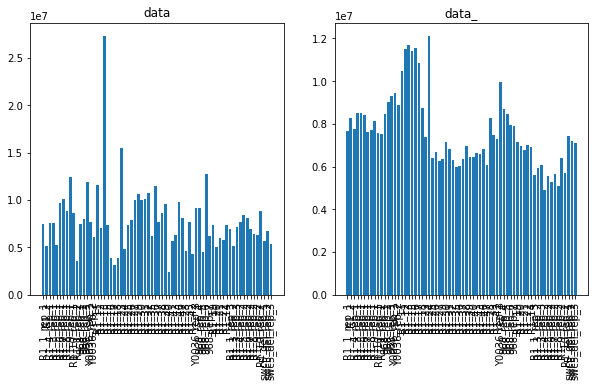

In [462]:
#plot the column totals in data and in data_
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(range(len(col_names)),np.sum(data,axis=0))
plt.xticks(range(len(col_names)),col_names,rotation=90)
plt.title('data')
plt.subplot(1,2,2)
plt.bar(range(len(col_names)),np.sum(data_,axis=0))
plt.xticks(range(len(col_names)),col_names,rotation=90)
plt.title('data_')
plt.show()


In [463]:
#import washing phenotypes /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste's original code/QTL mapping/washing_phenotypes.csv
washing = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste original code/QTL mapping/washing_phenotypes.csv',header=0,index_col=0)
washing.columns = ['genotype','phenotype']
#import filtering phenotypes /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste's original code/QTL mapping/filtering_phenotypes.csv
filtering = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste original code/QTL mapping/filtering_phenotypes.csv',header=0,index_col=0)
filtering.columns = ['genotype','phenotype']
#merge the two dataframes by genotype, and name the phenotypes washing and filtering
phenotypes = pd.merge(washing,filtering,on='genotype')
phenotypes.columns = ['genotype','washing','filtering']
phenotypes

,genotype,washing,filtering
0,X968,0.047930,0.081319
1,Y0036,0.172119,0.449411
2,R1_1,0.054247,0.104369
3,R1_10,0.028066,0.053252
4,R1_11,0.040438,0.063310
5,R1_12,0.421832,0.867539
6,R1_13,0.039811,0.021799
7,R1_14,0.042707,0.049553
8,R1_15,0.029537,0.031385
9,R1_16,0.023504,0.023788


In [464]:
#create an array called genotypes_to_retain, which has the entries from true_genotypes removing _rep_1 and _rep_2
genotypes_to_retain = [i.split('_rep_')[0] for i in true_genotypes]
#only retain the ones that are in the phenotypes dataframe
genotypes_to_retain = [i for i in genotypes_to_retain if i in phenotypes.genotype.values]
#subset col_names to include only the genotypes that are in genotypes_to_retain, or those + _rep_...
col_names_retained = [i for i in col_names if i in genotypes_to_retain or i.split('_rep_')[0] in genotypes_to_retain]
#index of which col_names were retained
ind = [i in col_names_retained for i in col_names]
#subset the data to only include the genotypes in genotypes_to_retain in the same order
data_full = data_.copy()
data_ = data_[:,ind]

#subset the phenotypes to only include the genotypes in genotypes_to_retain
#phenotypes = phenotypes[[i in genotypes_to_retain for i in phenotypes.genotype]]

In [434]:
col_names_retained_wo_reps = [i.split('_rep_')[0] for i in col_names_retained]
import scipy.stats as st
#create a new df for phenotypes with reordering phenotypes such that genotype matches the order of those in col_names_retained_wo_reps
phenotypes_ = pd.DataFrame(columns=['genotype','washing','filtering'])
for i in col_names_retained_wo_reps:
    phenotypes_ = phenotypes_.append(phenotypes.loc[phenotypes.genotype==i,:])
phenotypes_.index = range(len(phenotypes_))
phenotypes_
#extrac the two phenotypes as arrays from the df
washing = phenotypes_['washing'].values
filtering = phenotypes_['filtering'].values



def find_correlated_genes(data,phenotype, only_sig=True, add_function=True):
    df = pd.DataFrame(columns=['gene','correlation','p-value'])
    with warnings.catch_warnings():
        for i in range(data.shape[0]):
            print(i/float(data.shape[0]))
            cor = st.pearsonr(data[i,:],phenotype)[:2]
            df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
    #perform bonferroni correction
    df['p-value adj'] = df['p-value']*df.shape[0]
    #order by p-value
    df = df.sort_values(by='p-value')
    #only retain significant ones
    if only_sig:
        df = df[df['p-value adj']<0.05]
    #for each gene add the function (column 4 in gene_desc)
    if add_function:
        #find the row in gene_desc where the gene name matches either the entry in column 0 or 2
        #add the function from column 4 to the df
        df['function'] = [gene_desc.loc[(gene_desc[0]==i) | (gene_desc[2]==i),4].to_string(index=False)  for i in df.gene]
        #if entry in function is 'Series([], )' then replace with 'unknown'
        df['function'] = [i if i!='Series([], )' else 'unknown' for i in df['function']]
        #if gene name has -antisense- in it, then look for what is after that, and see if it has a function
        #if it does, then add that function to the df
        df["sense function"] = df["function"]
        for i in range(df.shape[0]):
            if '-antisense-' in df.gene.values[i]:
                #find the gene name before -antisense-
                gene_name = df.gene.values[i].split('-antisense-')[0]
                #find the function of that gene
                function = gene_desc.loc[(gene_desc[0]==gene_name) | (gene_desc[2]==gene_name),4].to_string(index=False)
                #if the function is not 'Series([], )' then add it to the df
                if function!='Series([], )':
                    df['sense function'].values[i] = function
                else:
                    df['sense function'].values[i] = 'unknown'

    return df

wash_df = find_correlated_genes(data_,washing)
filt_df = find_correlated_genes(data_,filtering)
#get correlation for gsf2 and other genes
gsf2_vals = data_[ind_names=='gsf2',:]
gsf2_corr = find_correlated_genes(data_full,gsf2_vals[0])
#get correlation for gsf2 and other genes
gsf1_vals = data_[ind_names=='gsf1',:]
gsf1_corr = find_correlated_genes(data_full,gsf1_vals[0])
#get correlation for mbx2 and other genes
mbx2_vals = data_[ind_names=='mbx2',:]
mbx2_corr = find_correlated_genes(data_full,mbx2_vals[0])
#get correlation for cbf11 and other genes
cbf11_vals = data_[ind_names=="cbf11",:]
cbf11_corr = find_correlated_genes(data_full,cbf11_vals[0])
#get correlation for cbf12 and other genes
cbf12_vals = data_[ind_names=="cbf12",:]
cbf12_corr = find_correlated_genes(data_full,cbf12_vals[0])
puf5_vals = data_[ind_names=="puf5",:]
puf5_corr = find_correlated_genes(data_full,puf5_vals[0])

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

In [499]:
wash_df.head(50)

,gene,correlation,p-value,p-value adj,function,sense function
807,pfl8,0.755394,0.0,0.0,"cell surface glycoprotein, flocculin Pfl8","cell surface glycoprotein, flocculin Pfl8"
3423,mbx2,0.707523,0.0,0.000004,"DNA-binding transcription factor, MADS-box Pvg4","DNA-binding transcription factor, MADS-box Pvg4"
594,pfl9,0.69685,0.0,0.000008,"cell surface glycoprotein, flocculin Pfl9, DIP...","cell surface glycoprotein, flocculin Pfl9, DIP..."
6316,hsp3102-antisense-1,0.680254,0.0,0.000029,antisense RNA (predicted),glyoxylase III Hsp3102
805,SPAC1F8.04c,0.656457,0.0,0.000149,"hydrolase, implicated in cellular detoxification","hydrolase, implicated in cellular detoxification"
4150,nce103,0.650311,0.0,0.000222,carbonic anhydrase,carbonic anhydrase
5482,pep3-antisense-1,0.649353,0.0,0.000236,antisense RNA (predicted),"HOPS/CORVET complex subunit, ubiquitin-protein..."
6308,isp3-antisense-1,0.627371,0.0,0.000919,antisense RNA (predicted),spore wall structural constituent Isp3
3244,the4,0.622556,0.0,0.00122,acyl-coenzyme A thioesterase The4,acyl-coenzyme A thioesterase The4
2892,spo6,0.618629,0.0,0.001533,Spo4-Spo6 kinase complex regulatory subunit Spo6,Spo4-Spo6 kinase complex regulatory subunit Spo6


0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

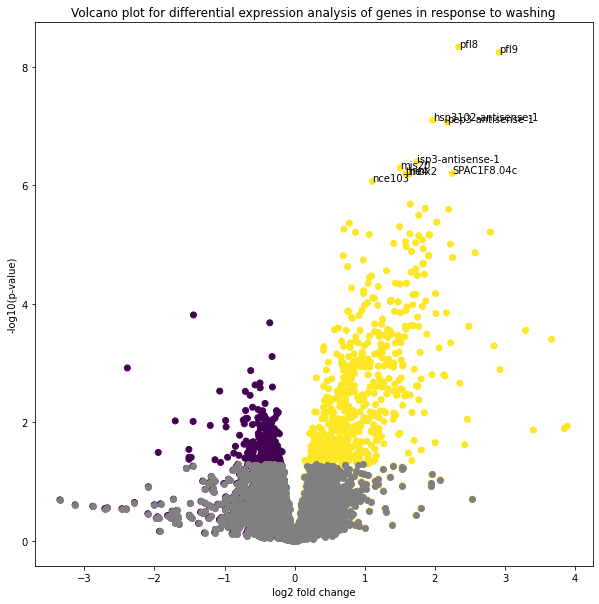

In [504]:
#add a new column for phenotype, where if washing is above 0.25, then it is 1, otherwise 0
phenotypes_['wash_pheno'] = [1 if i>0.5 else 0 for i in phenotypes_.washing]
#add a new column for phenotype, where if filtering is above 0.25, then it is 1, otherwise 0
phenotypes_['filter_pheno'] = [1 if i>0.5 else 0 for i in phenotypes_.filtering]
#perform differential expression analysis in data_ for those genotypes that have wash_pheno==1 vs those that have wash_pheno==0
#take the mean for each group, then divide them and take the log2 and get p-value
#create a results df, with columns gene, log2 fold change, p-value
wash_results = pd.DataFrame(columns=['gene','log2 fold change','p-value'])
for i in range(data_.shape[0]):
    print(i/float(data_.shape[0]))
    #get the mean of the values for each group
    mean_0 = np.mean(data_[i,phenotypes_.wash_pheno==0])
    mean_1 = np.mean(data_[i,phenotypes_.wash_pheno==1])
    #get the log2 fold change
    log2_fold_change = np.log2(mean_1/mean_0)
    #get the p-value
    p_val = st.ttest_ind(data_[i,phenotypes_.wash_pheno==0],data_[i,phenotypes_.wash_pheno==1])[1]
    #add the results to the df
    wash_results = wash_results.append({'gene':ind_names[i],'log2 fold change':log2_fold_change,'p-value':p_val},ignore_index=True)
#remove nans
wash_results = wash_results.dropna()
#perform bonferroni correction
wash_results['p-value adj'] = wash_results['p-value']*wash_results.shape[0]
#order by p-value
wash_results = wash_results.sort_values(by='p-value')

#using the log2fold change and p values create a volcano plot

#create a large figure
plt.figure(figsize=(10,10))
#make volcano plot using matplotlib and color points whether they are up or down regulated
#to the p_values add 10^-300 to avoid taking log of 0
plt.scatter(wash_results['log2 fold change'],-np.log10(np.array(wash_results['p-value']+10**-100,dtype=float)),c=wash_results['log2 fold change']>0)
#if logpval is less than threshold, color with gray
plt.scatter(wash_results['log2 fold change'][wash_results['p-value']>0.05],-np.log10(np.array(wash_results['p-value'][wash_results['p-value']>0.05]+10**-100,dtype=float)),c='gray')
#make plot pretty
plt.xlabel('log2 fold change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot for differential expression analysis of genes in response to washing')
#label very highly significant points
for i in range(wash_results.shape[0]):
    if wash_results['p-value adj'].values[i]<0.01:
        plt.annotate(wash_results.gene.values[i],(wash_results['log2 fold change'].values[i],-np.log10(wash_results['p-value'].values[i])))
plt.show()



0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

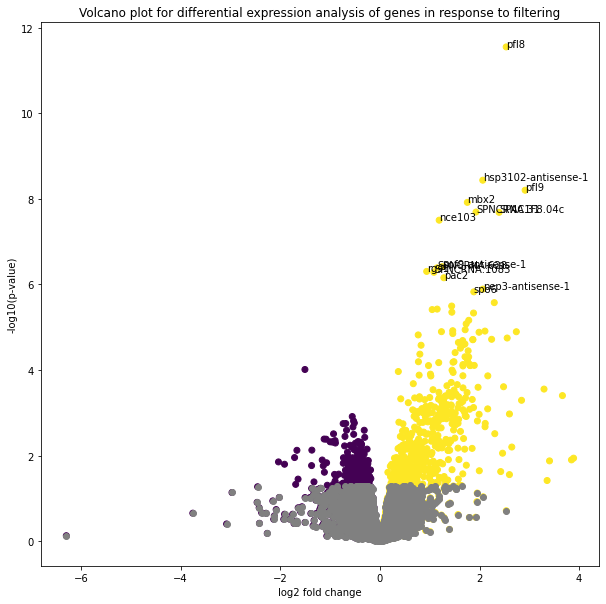

In [505]:
#do the same for filtering_results

filter_results = pd.DataFrame(columns=['gene','log2 fold change','p-value'])
for i in range(data_.shape[0]):
    print(i/float(data_.shape[0]))
    #get the mean of the values for each group
    mean_0 = np.mean(data_[i,phenotypes_.filter_pheno==0])
    mean_1 = np.mean(data_[i,phenotypes_.filter_pheno==1])
    #get the log2 fold change
    log2_fold_change = np.log2(mean_1/mean_0)
    #get the p-value
    p_val = st.ttest_ind(data_[i,phenotypes_.filter_pheno==0],data_[i,phenotypes_.filter_pheno==1])[1]
    #add the results to the df
    filter_results = filter_results.append({'gene':ind_names[i],'log2 fold change':log2_fold_change,'p-value':p_val},ignore_index=True)
#remove nans
filter_results = filter_results.dropna()
#perform bonferroni correction
filter_results['p-value adj'] = filter_results['p-value']*filter_results.shape[0]
#order by p-value
filter_results = filter_results.sort_values(by='p-value')

#using the log2fold change and p values create a volcano plot
plt.figure(figsize=(10,10))
#make volcano plot using matplotlib and color points whether they are up or down regulated
#to the p_values add 10^-300 to avoid taking log of 0
plt.scatter(filter_results['log2 fold change'],-np.log10(np.array(filter_results['p-value']+10**-100,dtype=float)),c=filter_results['log2 fold change']>0)
#if logpval is less than threshold, color with gray
plt.scatter(filter_results['log2 fold change'][filter_results['p-value']>0.05],-np.log10(np.array(filter_results['p-value'][filter_results['p-value']>0.05]+10**-100,dtype=float)),c='gray')
#make plot pretty
plt.xlabel('log2 fold change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot for differential expression analysis of genes in response to filtering')
#label very highly significant points
for i in range(filter_results.shape[0]):
    if filter_results['p-value adj'].values[i]<0.01:
        plt.annotate(filter_results.gene.values[i],(filter_results['log2 fold change'].values[i],-np.log10(filter_results['p-value'].values[i])))



In [506]:
filter_results.head(20)

,gene,log2 fold change,p-value,p-value adj
807,pfl8,2.534274,0.0,0.0
6316,hsp3102-antisense-1,2.064068,0.0,0.000024
594,pfl9,2.914583,0.0,0.000042
3423,mbx2,1.754587,0.0,0.00008
6060,SPNCRNA.31,1.928366,0.0,0.000135
805,SPAC1F8.04c,2.39149,0.0,0.000137
4150,nce103,1.18902,0.0,0.000209
5696,pof9-antisense-1,1.246265,0.0,0.002551
6332,SPNCRNA.628,1.145874,0.0,0.002716
938,rgs1,0.938,0.0,0.003289


In [470]:
cbf12_corr.head(50)


,gene,correlation,p-value,p-value adj,function,sense function
4274,cbf12,1.0,0.0,0.0,"DNA-binding transcription factor, CBF1/Su(H)/L...","DNA-binding transcription factor, CBF1/Su(H)/L..."
2749,rix7,0.786241,0.0,0.0,ribosome assembly ATPase Rix7,ribosome assembly ATPase Rix7
4715,SPCC320.03,0.767189,0.0,0.0,DNA-binding transcription factor,DNA-binding transcription factor
1851,cdr1,0.760393,0.0,0.0,serine/threonine protein kinase (NIM1 family) ...,serine/threonine protein kinase (NIM1 family) ...
1292,SPAC29E6.06c,0.757506,0.0,0.0,cytoplasmic cysteine-tRNA ligase Crs1,cytoplasmic cysteine-tRNA ligase Crs1
4337,gdh2,0.744117,0.0,0.0,NAD-dependent glutamate dehydrogenase Gdh2,NAD-dependent glutamate dehydrogenase Gdh2
4454,utp21,0.742046,0.0,0.0,U3 snoRNP-associated protein Utp21,U3 snoRNP-associated protein Utp21
4544,vid21,0.734971,0.0,0.0,NuA4 histone acetyltransferase complex subunit...,NuA4 histone acetyltransferase complex subunit...
4886,sup35,0.728954,0.0,0.000001,cytoplasmic translation release factor class I...,cytoplasmic translation release factor class I...
2504,mef1,0.723555,0.0,0.000001,mitochondrial translation elongation factor G ...,mitochondrial translation elongation factor G ...


In [481]:
puf5_vals = data_full[ind_names=="puf5",:]
puf5_corr = find_correlated_genes(data_full,puf5_vals[0])

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

In [483]:
puf5_corr.head(50)

,gene,correlation,p-value,p-value adj,function,sense function
1678,puf5,1.0,0.0,0.0,pumilio family RNA-binding protein Puf5,pumilio family RNA-binding protein Puf5
4337,gdh2,0.77278,0.0,0.0,NAD-dependent glutamate dehydrogenase Gdh2,NAD-dependent glutamate dehydrogenase Gdh2
306,slr1,0.708424,0.0,0.0,"RNA-binding protein, LARP1 family Slr1","RNA-binding protein, LARP1 family Slr1"
1049,fep1,0.704478,0.0,0.0,"DNA-binding transcription factor, iron-sensing...","DNA-binding transcription factor, iron-sensing..."
3480,cdh1,0.702053,0.0,0.0,18S rRNA dimethylase Cdh1,18S rRNA dimethylase Cdh1
1844,rex1,0.699689,0.0,0.0,3'-5'- exoribonuclease Rex1,3'-5'- exoribonuclease Rex1
990,frs1,0.698918,0.0,0.0,cytoplasmic phenylalanine-tRNA ligase beta sub...,cytoplasmic phenylalanine-tRNA ligase beta sub...
52,pma1,0.68815,0.0,0.000001,plasma membrane P-type proton exporting ATPase...,plasma membrane P-type proton exporting ATPase...
1628,sec71,0.687196,0.0,0.000001,Arf GEF,Arf GEF
2599,kap123,0.682956,0.0,0.000001,karyopherin/importin beta family nuclear impor...,karyopherin/importin beta family nuclear impor...


In [487]:
#find pvg1 in puf5_corr
puf5_corr[puf5_corr.gene=="SPBPB7E8.01"]

,gene,correlation,p-value,p-value adj,function,sense function


In [486]:
#is pvg1 in the dataset
"SPBPB7E8.01" in ind_names

True

In [513]:
wash_df

,gene,correlation,p-value,p-value adj,function,sense function
807,pfl8,0.755394,0.0,0.0,"cell surface glycoprotein, flocculin Pfl8","cell surface glycoprotein, flocculin Pfl8"
3423,mbx2,0.707523,0.0,0.000004,"DNA-binding transcription factor, MADS-box Pvg4","DNA-binding transcription factor, MADS-box Pvg4"
594,pfl9,0.69685,0.0,0.000008,"cell surface glycoprotein, flocculin Pfl9, DIP...","cell surface glycoprotein, flocculin Pfl9, DIP..."
6316,hsp3102-antisense-1,0.680254,0.0,0.000029,antisense RNA (predicted),glyoxylase III Hsp3102
805,SPAC1F8.04c,0.656457,0.0,0.000149,"hydrolase, implicated in cellular detoxification","hydrolase, implicated in cellular detoxification"
4150,nce103,0.650311,0.0,0.000222,carbonic anhydrase,carbonic anhydrase
5482,pep3-antisense-1,0.649353,0.0,0.000236,antisense RNA (predicted),"HOPS/CORVET complex subunit, ubiquitin-protein..."
6308,isp3-antisense-1,0.627371,0.0,0.000919,antisense RNA (predicted),spore wall structural constituent Isp3
3244,the4,0.622556,0.0,0.00122,acyl-coenzyme A thioesterase The4,acyl-coenzyme A thioesterase The4
2892,spo6,0.618629,0.0,0.001533,Spo4-Spo6 kinase complex regulatory subunit Spo6,Spo4-Spo6 kinase complex regulatory subunit Spo6


In [522]:
#does filt_df have a gene starting with rpl
filt_df[filt_df.gene.str.startswith("isp3")]

,gene,correlation,p-value,p-value adj,function,sense function


In [523]:
filt_df

,gene,correlation,p-value,p-value adj,function,sense function
3423,mbx2,0.756145,0.0,0.0,"DNA-binding transcription factor, MADS-box Pvg4","DNA-binding transcription factor, MADS-box Pvg4"
807,pfl8,0.700905,0.0,0.000006,"cell surface glycoprotein, flocculin Pfl8","cell surface glycoprotein, flocculin Pfl8"
1426,pac2,0.61812,0.0,0.001578,cAMP-independent regulatory protein Pac2,cAMP-independent regulatory protein Pac2
4038,pfl3,0.603282,0.000001,0.003625,"cell surface glycoprotein, flocculin Pfl3, DIP...","cell surface glycoprotein, flocculin Pfl3, DIP..."
5696,pof9-antisense-1,0.58575,0.000001,0.009188,antisense RNA (predicted),F-box protein Pof9
4150,nce103,0.583954,0.000001,0.010076,carbonic anhydrase,carbonic anhydrase
805,SPAC1F8.04c,0.582058,0.000002,0.011099,"hydrolase, implicated in cellular detoxification","hydrolase, implicated in cellular detoxification"
5268,SPNCRNA.1083,0.577086,0.000002,0.014263,intergenic RNA (predicted),intergenic RNA (predicted)
594,pfl9,0.572507,0.000003,0.017904,"cell surface glycoprotein, flocculin Pfl9, DIP...","cell surface glycoprotein, flocculin Pfl9, DIP..."
2892,spo6,0.572064,0.000003,0.0183,Spo4-Spo6 kinase complex regulatory subunit Spo6,Spo4-Spo6 kinase complex regulatory subunit Spo6


In [526]:
_corr.head(50)

NameError: name 'gsf1_corr' is not defined

In [529]:
#get correlation for gsf2 and other genes
gsf1_vals = data_full[ind_names=='gsf1',:]
gsf1_corr = find_correlated_genes(data_full,gsf1_vals[0])
gsf1_corr.head(50)

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

,gene,correlation,p-value,p-value adj,function,sense function
2627,gsf1,1.0,0.0,0.0,"DNA-binding transcription factor, zf-fungal bi...","DNA-binding transcription factor, zf-fungal bi..."
3565,SPBC365.16,0.931431,0.0,0.0,"mitochondrial membrane protein, conserved in y...","mitochondrial membrane protein, conserved in y..."
3782,SPBC56F2.05c,0.930579,0.0,0.0,DNA-binding transcription factor,DNA-binding transcription factor
4502,sts5,0.916638,0.0,0.0,"cytoplasmic P body 3'-5'-exoribonuclease, Dis3...","cytoplasmic P body 3'-5'-exoribonuclease, Dis3..."
4213,SPBPB7E8.02,0.912,0.0,0.0,PSP1 family protein,PSP1 family protein
4361,fil1,0.90722,0.0,0.0,"DNA-binding transcription factor, zf-GATA type","DNA-binding transcription factor, zf-GATA type"
432,gti1,0.904507,0.0,0.0,gluconate transmembrane transporter inducer Gti1,gluconate transmembrane transporter inducer Gti1
2070,cgs1,0.898845,0.0,0.0,cAMP-dependent protein kinase regulatory subun...,cAMP-dependent protein kinase regulatory subun...
4051,pib2,0.894714,0.0,0.0,zf-FYVE type zinc finger protein and glutamine...,zf-FYVE type zinc finger protein and glutamine...
620,edc1,0.891242,0.0,0.0,Dcp2-Dcp1 mRNA-decapping complex subunit Edc1,Dcp2-Dcp1 mRNA-decapping complex subunit Edc1


In [531]:
#is rad24 in gsf1_corr

,gene,correlation,p-value,p-value adj,function,sense function
2627,gsf1,1.0,0.0,0.0,"DNA-binding transcription factor, zf-fungal bi...","DNA-binding transcription factor, zf-fungal bi..."
3565,SPBC365.16,0.931431,0.0,0.0,"mitochondrial membrane protein, conserved in y...","mitochondrial membrane protein, conserved in y..."
3782,SPBC56F2.05c,0.930579,0.0,0.0,DNA-binding transcription factor,DNA-binding transcription factor
4502,sts5,0.916638,0.0,0.0,"cytoplasmic P body 3'-5'-exoribonuclease, Dis3...","cytoplasmic P body 3'-5'-exoribonuclease, Dis3..."
4213,SPBPB7E8.02,0.912,0.0,0.0,PSP1 family protein,PSP1 family protein
...,...,...,...,...,...,...
4085,sbg1,-0.514369,0.000007,0.048665,plasma membrane-actinomyosin ring linker prote...,plasma membrane-actinomyosin ring linker prote...
5821,SPNCRNA.159,-0.514325,0.000007,0.048767,NaN,NaN
5654,SPNCRNA.1432,-0.51424,0.000007,0.048967,"intergenic RNA (predicted), possible alternati...","intergenic RNA (predicted), possible alternati..."
4793,cwf20,-0.514214,0.000007,0.049026,complexed with Cdc5 protein Cwf20,complexed with Cdc5 protein Cwf20


In [534]:
wash_results.head(50)

,gene,log2 fold change,p-value,p-value adj
807,pfl8,2.341258,0.0,0.000031
594,pfl9,2.918144,0.0,0.000038
6316,hsp3102-antisense-1,1.968129,0.0,0.00053
5482,pep3-antisense-1,2.178867,0.0,0.000577
6308,isp3-antisense-1,1.746757,0.0,0.002658
3931,mis20,1.504169,0.000001,0.003406
805,SPAC1F8.04c,2.250376,0.000001,0.004196
3244,the4,1.583832,0.000001,0.004261
3423,mbx2,1.631185,0.000001,0.004314
4150,nce103,1.109699,0.000001,0.005692


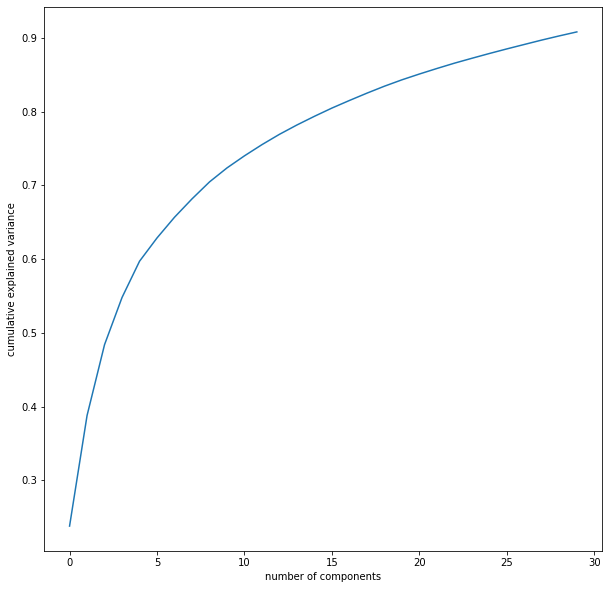

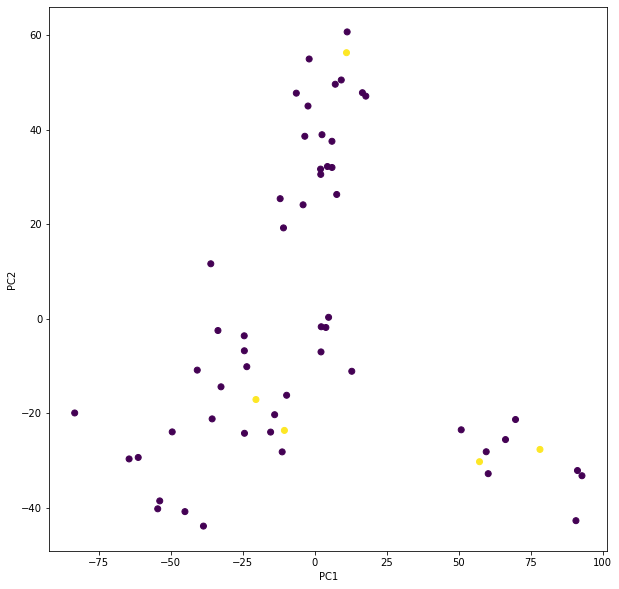

In [541]:
#perform pca of data_ and then plot the first two components, show their explained variance. Color points by wash_pheno
#import PCA tools from sklearn
from sklearn.decomposition import PCA
#center and scale the rows of data_ using sklearn
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data_.T).T
#perform pca
pca = PCA(n_components=30)
pca.fit(data_scaled.T)
#plot the explained variance
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#transform the data
data_pca = pca.transform(data_scaled.T)
#plot the first two components
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0],data_pca[:,1],c=phenotypes_.wash_pheno)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



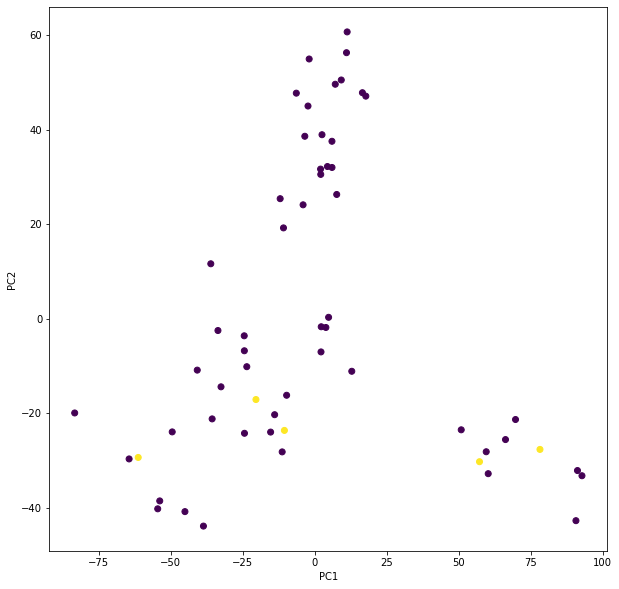

In [542]:
#plot the first two components
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0],data_pca[:,1],c=phenotypes_.filter_pheno)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
